# An Analysis of Childcare Prices Across the United States
## Drake Capstone Project
### Author: Cera Drake
### June 2025

##### Import and load the dataset

In [1]:
import pandas as pd

df = pd.read_csv("nationaldatabaseofchildcareprices.csv", encoding='latin1')  
print(df.head())

  State_Name State_Abbreviation     County_Name  County_FIPS_Code  StudyYear  \
0    Alabama                 AL  Autauga County              1001       2008   
1    Alabama                 AL  Autauga County              1001       2009   
2    Alabama                 AL  Autauga County              1001       2010   
3    Alabama                 AL  Autauga County              1001       2011   
4    Alabama                 AL  Autauga County              1001       2012   

   UNR_16  FUNR_16  MUNR_16  UNR_20to64  FUNR_20to64  ...  MFCCToddler  \
0    5.42     4.41     6.32         4.6          3.5  ...      $83.45    
1    5.93     5.72     6.11         4.8          4.6  ...      $87.39    
2    6.21     5.57     6.78         5.1          4.6  ...      $91.33    
3    7.55     8.13     7.03         6.2          6.3  ...      $95.28    
4    8.60     8.88     8.29         6.7          6.4  ...      $99.22    

   MFCCToddler_flag  MFCCPreschool  MFCCPreschool_flag  _75FCCInfant  \
0 

In [2]:
df = pd.read_csv("nationaldatabaseofchildcareprices.csv", encoding= 'latin1')
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 34567
Number of columns: 227


In [3]:
df.columns

Index(['State_Name', 'State_Abbreviation', 'County_Name', 'County_FIPS_Code',
       'StudyYear', 'UNR_16', 'FUNR_16', 'MUNR_16', 'UNR_20to64',
       'FUNR_20to64',
       ...
       'MFCCToddler', 'MFCCToddler_flag', 'MFCCPreschool',
       'MFCCPreschool_flag', '_75FCCInfant', '_75FCCInfant_flag',
       '_75FCCToddler', '_75FCCToddler_flag', '_75FCCPreschool',
       '_75FCCPreschool_flag'],
      dtype='object', length=227)

### Clean the Data

In [4]:
# View the missing data
missing = df.isnull().sum()
print(missing[missing > 0])

H_Under6_SingleM            2
H_6to17_SingleM             2
MCBto5                  10974
MC6to11                 10974
MC12to17                10974
                        ...  
_75FCCInfant_flag       11184
_75FCCToddler           11184
_75FCCToddler_flag      11184
_75FCCPreschool         11184
_75FCCPreschool_flag    11184
Length: 114, dtype: int64


In [5]:
# See what percentage of columns have missing data in the columns that I will be using
missing = df[[
    '_75FCCInfant', '_75FCCToddler', '_75FCCPreschool',
    '_75CInfant', '_75CToddler', '_75CPreschool'
]].isnull().mean() * 100

print(missing)

_75FCCInfant       32.354558
_75FCCToddler      32.354558
_75FCCPreschool    32.354558
_75CInfant         31.747042
_75CToddler        31.747042
_75CPreschool      31.747042
dtype: float64


In [6]:
# See what percentage of columns have missing data in the columns that I will be using
missing = df[[
    '_75FCCInfant_flag', '_75FCCToddler_flag', '_75FCCPreschool_flag',
    '_75CInfant_flag', '_75CToddler_flag', '_75CPreschool_flag'
]].isnull().mean() * 100

print(missing)

_75FCCInfant_flag       32.354558
_75FCCToddler_flag      32.354558
_75FCCPreschool_flag    32.354558
_75CInfant_flag         31.747042
_75CToddler_flag        31.747042
_75CPreschool_flag      31.747042
dtype: float64


In [7]:
# Over 30% of the rows in each of the columns I want to use has missing data. That is too much. Let's limit it to more recent years
# Filter for years 2014-2018
df_recent = df[df['StudyYear'].between(2014, 2018)]

In [8]:
# Keep only the columns I want to use
columns_to_use = [
    'State_Name', 'StudyYear',
    '_75FCCInfant', '_75FCCToddler', '_75FCCPreschool',
    '_75CInfant', '_75CToddler', '_75CPreschool'
]
df_recent = df_recent[columns_to_use]

In [9]:
# Remove missing values
df_clean = df_recent.dropna()

In [10]:
#Show remaining data
print("Number of rows after filtering:", len(df_clean))
print("Number of unique states:", df_clean['State_Name'].nunique())
print("Years included:", df_clean['StudyYear'].unique())

Number of rows after filtering: 12045
Number of unique states: 48
Years included: [2014 2015 2016 2017 2018]


In [11]:
df_clean.to_csv("cleaned_childcare_data.csv", index=False)

In [12]:
# Load the cleaned data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("cleaned_childcare_data.csv")

0
(72270, 5)
count    72270.000000
mean       143.957952
std         50.323744
min         46.450000
25%        111.252500
50%        131.580000
75%        163.295000
max        515.000000
Name: price, dtype: float64


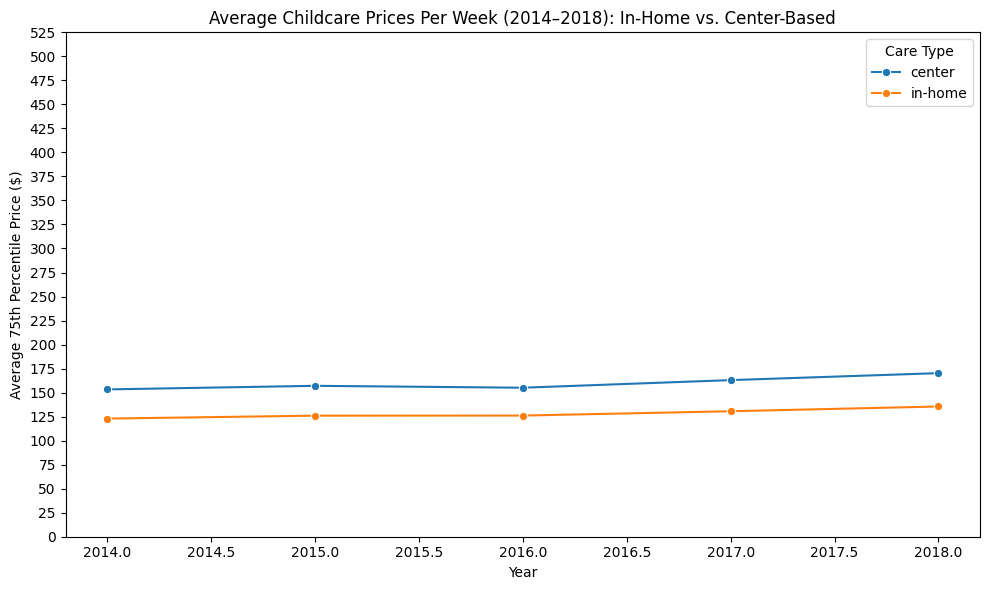

In [13]:
df_melted = df.melt(
    id_vars=['StudyYear'],
    value_vars=[
        '_75FCCInfant', '_75FCCToddler', '_75FCCPreschool',
        '_75CInfant', '_75CToddler', '_75CPreschool'
    ],
    var_name='care_age',
    value_name='price'
)

# Extract care type and age group
df_melted['care_type'] = df_melted['care_age'].apply(
    lambda x: 'in-home' if 'FCC' in x else 'center'
)
df_melted['age_group'] = df_melted['care_age'].str.extract(r'(Infant|Toddler|Preschool)')

df_melted['price'] = (
    df_melted['price']
    .astype(str)                             
    .str.replace(r'[\$,]', '', regex=True)   
    .str.replace(r'\s+', '', regex=True)     
    .replace('', np.nan)                    
    .astype(float)                          
)
print(df_melted['price'].isna().sum())
print(df_melted.shape)

# Group by year and care_type to get average
avg_prices = df_melted.groupby(['StudyYear', 'care_type'])['price'].mean().reset_index()

print(df_melted['price'].describe())

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_prices, x='StudyYear', y='price', hue='care_type', marker='o')

plt.title('Average Childcare Prices Per Week (2014–2018): In-Home vs. Center-Based')
plt.xlabel('Year')
plt.ylabel('Average 75th Percentile Price ($)')
plt.yticks(np.arange(0, df_melted['price'].max() + 25, 25))
plt.legend(title='Care Type')
plt.tight_layout()
plt.show()

In [14]:
# Find the state with the most expensive child care on average
# Melt data frame
df_melted = df.melt(
    id_vars=['State_Name', 'StudyYear'],
    value_vars=[
        '_75FCCInfant', '_75FCCToddler', '_75FCCPreschool',
        '_75CInfant', '_75CToddler', '_75CPreschool'
    ],
    var_name='care_age',
    value_name='price'
)

# 2. Clean the price column
df_melted['price'] = (
    df_melted['price']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .str.replace(r'\s+', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)

# 3. Group by State and calculate average price
avg_price_by_state = df_melted.groupby('State_Name')['price'].mean().reset_index()

# 4. Sort to find the most expensive
top_states = avg_price_by_state.sort_values(by='price', ascending=False)

# 5. Display the top result
print("State with the most expensive childcare on average (Price Per Week):")
print(top_states.head(5))

State with the most expensive childcare on average (Price Per Week):
       State_Name       price
19  Massachusetts  289.825571
10         Hawaii  257.738667
6     Connecticut  255.368333
44     Washington  249.249846
36   Rhode Island  238.557000


C:\Users\cerad\AppData\Local\Temp\ipykernel_34552\2698638550.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_inhome, x='price', y='State_Name', palette='Blues_r', ax=axes[0])
C:\Users\cerad\AppData\Local\Temp\ipykernel_34552\2698638550.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_center, x='price', y='State_Name', palette='Oranges_r', ax=axes[1])


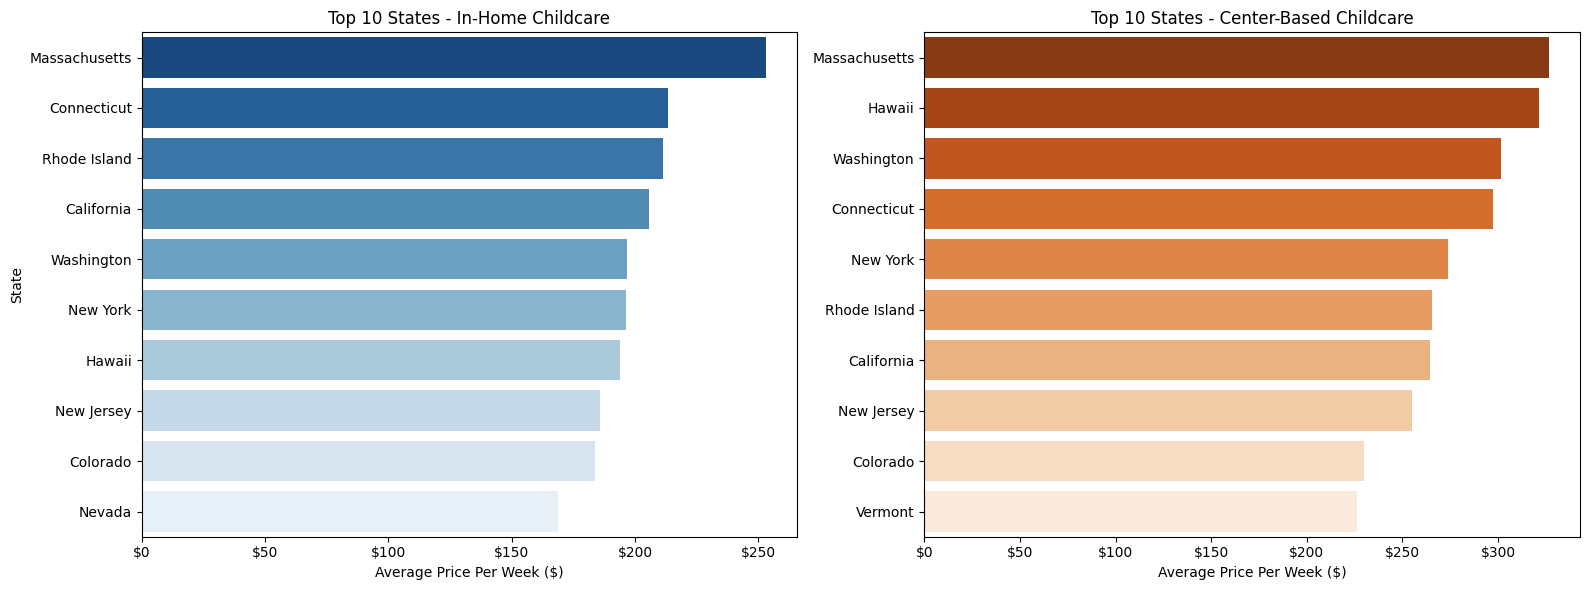

In [15]:
# Display states with most expensive childcare but differentiate between type of care
import matplotlib.ticker as mtick

# 1. Melt the dataframe
df_melted = df.melt(
    id_vars=['State_Name', 'StudyYear'],
    value_vars=[
        '_75FCCInfant', '_75FCCToddler', '_75FCCPreschool',
        '_75CInfant', '_75CToddler', '_75CPreschool'
    ],
    var_name='care_age',
    value_name='price'
)

# 2. Extract care type
df_melted['care_type'] = df_melted['care_age'].apply(
    lambda x: 'in-home' if 'FCC' in x else 'center'
)

# 3. Clean the price column
df_melted['price'] = (
    df_melted['price']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .str.replace(r'\s+', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)

# 4. Group by state and care type, then compute average price
avg_price_by_state_type = df_melted.groupby(['State_Name', 'care_type'])['price'].mean().reset_index()

# 5. Get top 10 for each care type
top10_inhome = avg_price_by_state_type[avg_price_by_state_type['care_type'] == 'in-home'] \
    .sort_values(by='price', ascending=False).head(10)

top10_center = avg_price_by_state_type[avg_price_by_state_type['care_type'] == 'center'] \
    .sort_values(by='price', ascending=False).head(10)

# 6. Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=False)

# In-home
sns.barplot(data=top10_inhome, x='price', y='State_Name', palette='Blues_r', ax=axes[0])
axes[0].set_title('Top 10 States - In-Home Childcare')
axes[0].set_xlabel('Average Price Per Week ($)')
axes[0].set_ylabel('State')
axes[0].xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Center-based
sns.barplot(data=top10_center, x='price', y='State_Name', palette='Oranges_r', ax=axes[1])
axes[1].set_title('Top 10 States - Center-Based Childcare')
axes[1].set_xlabel('Average Price Per Week ($)')
axes[1].set_ylabel('')  # Don't repeat label
axes[1].xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

In [16]:
# Create a linear regression model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Drop rows with missing prices
df_ml = df_melted.dropna(subset=['price'])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_ml[['State_Name', 'StudyYear', 'care_type', 'care_age']], drop_first=True)

# Define features (X) and target (y)
X = df_encoded
y = df_ml['price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
#Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
#Evaluate performance
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

Root Mean Square Error (RMSE): 30.67


In [20]:
#COmpare to other models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Dictionary to store models and their RMSEs
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse
    print(f'{name} RMSE: {rmse:.2f}')


Linear Regression RMSE: 30.67
Decision Tree RMSE: 28.52
Random Forest RMSE: 28.51
Gradient Boosting RMSE: 32.11
KNN RMSE: 31.06


C:\Users\cerad\AppData\Local\Temp\ipykernel_34552\1517500191.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rmse_df, x='RMSE', y='Model', palette='viridis')


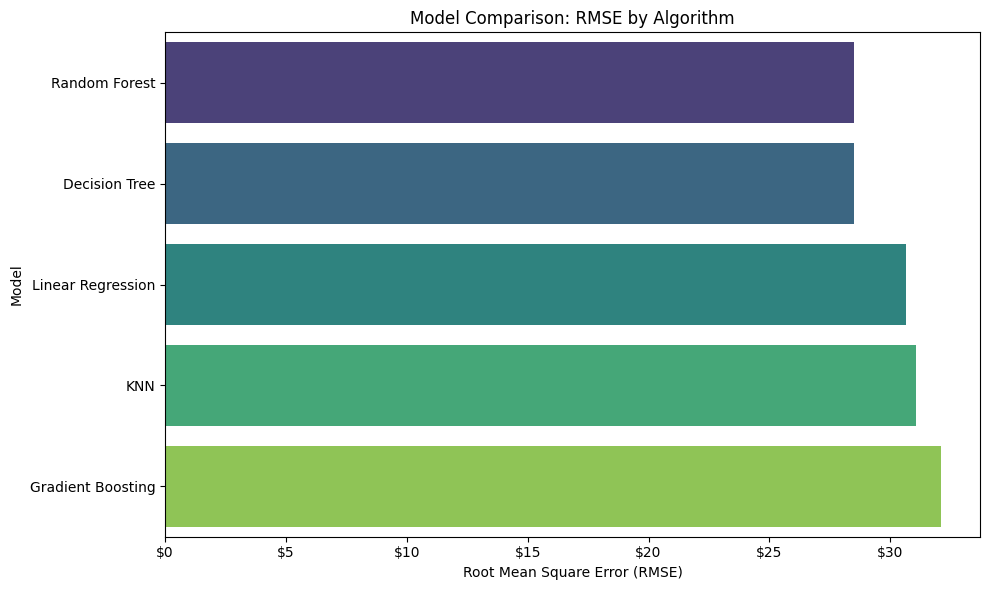

In [21]:
# Visualize model comparisons
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results dictionary to DataFrame
rmse_df = pd.DataFrame(list(results.items()), columns=['Model', 'RMSE'])

# Sort models by RMSE (lower is better)
rmse_df = rmse_df.sort_values(by='RMSE')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=rmse_df, x='RMSE', y='Model', palette='viridis')

plt.title('Model Comparison: RMSE by Algorithm')
plt.xlabel('Root Mean Square Error (RMSE)')
plt.ylabel('Model')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))  # Dollar formatting

plt.tight_layout()
plt.show()